In [1]:
# All imports required
import os
import urllib3
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Check if dataset is already present in project directory, else download from UCI repository
if not os.path.exists('wine.data'):
    http = urllib3.PoolManager()
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    r = http.request('GET', url)
    with open('wine.data', 'wb') as f:
        f.write(r.data)
        r.status

In [3]:
# Load dataset into dataframe
feature_names = ['Winery', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.data', header=None, names = feature_names, index_col=None)
df.head()

,Winery,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Split dataframe into data and target
target = df['Winery']
data = df.drop(['Winery'], axis='columns')

In [5]:
# View top 5 rows of data
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# View top 5 rows of target
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Winery, dtype: int64

In [11]:
# Split data and target into training sets and test sets
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)
print('Dimensions of data_train: {}'.format(data_train.shape))
print('Dimensions of data_test: {}'.format(data_test.shape))
print('Dimensions of target_train: {}'.format(target_train.shape))
print('Dimensions of target_test: {}'.format(target_test.shape))

Dimensions of data_train: (133, 13)
Dimensions of data_test: (45, 13)
Dimensions of target_train: (133,)
Dimensions of target_test: (45,)


In [12]:
# Built a pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'pca__n_components': np.arange(1, data_train.shape[1] + 1),
    'knn__n_neighbors': np.arange(1, data_train.shape[0] // 2)
}
model = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
model.fit(data_train, target_train)
model.best_params_

{'knn__n_neighbors': 14, 'pca__n_components': 6}

In [13]:
# Calculate Accuracy of prediction
print(f'Training score: {model.score(data_train, target_train)}')
print(f'Test score: {model.score(data_test, target_test)}')

Training score: 0.9774436090225563
Test score: 0.9777777777777777


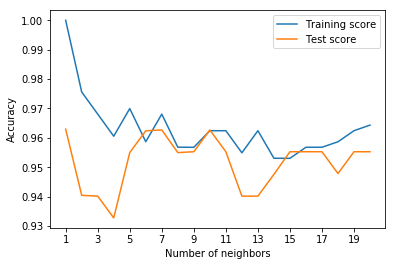

In [14]:
# Plot accuracy vs different values for k from 1 to 20
scores = validation_curve(pipe, data_train, target_train, 'knn__n_neighbors', np.arange(1, 21), cv=5)
plt.plot(np.arange(1, 21), scores[0].mean(axis=1), label='Training score')
plt.plot(np.arange(1, 21), scores[1].mean(axis=1), label='Test score')
plt.xticks(np.arange(1, 21, 2))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')